# 1-1.데이터 전처리
- 데이터를 가지고 분석 ,기계학습 하기 전에 데이터를 가공하는 작업 
- 컬럼이나 인덱스 이름을 변경
- 행과 열의 순서를 변경
- 데이터 정렬
- 데이터 검색
- 행, 열 추가
- 행, 열 삭제
- 두 개 이상의 데이터 프레임 병합 
- 등등,..

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df1 = pd.read_csv('data/grade.csv', encoding='euc-kr')
df1

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
1,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN
3,수현,3,여자,63,60.0,31.0,70.0
4,호영,4,남자,120,50.0,NaN,88.0


# 1-2.inplace 
- 제공되는 전처리 관련 함수들은 inplace 매개변수를 제공하는 것들이 있다.
- inplace가 없는 함수들은 원본을 수정하거나 원본을 유지한 채 작업이  반영된 새로운 것을 생성해 반환한다.
- inplace를 제공할 경우 True를 넣어주면 원본이 변경되고 False 넣어주면 원번은 유지하고 작업이 반영된 새로운 것을 생성해 반환한다.

In [ ]:
df1

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
1,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN
3,수현,3,여자,63,60.0,31.0,70.0
4,호영,4,남자,120,50.0,NaN,88.0


In [ ]:
# 행, 열의 순서 변경 - 지정된 컬럼 데이터를 지정된 순서로 가져온다
# 원본은 유지하고 순서가 변경된 데이터 프레임을 새롭게 생성해서 반환한다.
a1 = ['과학','수학','영어','국어','성별','학년','이름']
df2 = df1.reindex(columns=a1)
display(df2)
display(df1)

,과학,수학,영어,국어,성별,학년,이름
0,64.0,88.0,NaN,98,남자,1,철수
1,72.0,62.0,90.0,88,여자,2,영희
2,NaN,NaN,70.0,92,남자,1,민수
3,70.0,31.0,60.0,63,여자,3,수현
4,88.0,NaN,50.0,120,남자,4,호영


,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
1,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN
3,수현,3,여자,63,60.0,31.0,70.0
4,호영,4,남자,120,50.0,NaN,88.0


In [ ]:
# 일부만 작성하면 일부만 추출하는 효과를 얻을 수 있다.
# reindex의 의미는 재정렬 의미를 가지고 있지만 일부 추출도 가능하다.

df3 = df1.reindex(columns=['국어','영어','수학'])
df3

,국어,영어,수학
0,98,NaN,88.0
1,88,90.0,62.0
2,92,70.0,NaN
3,63,60.0,31.0
4,120,50.0,NaN


In [ ]:
# 없는 이름을 지정해서 가져온다
# 없는 이름의 컬럼이 추가되고 모두 결측치로 채워진다.
df4 = df1.reindex(columns=['국어','영어','한국사'])
df4

,국어,영어,한국사
0,98,NaN,NaN
1,88,90.0,NaN
2,92,70.0,NaN
3,63,60.0,NaN
4,120,50.0,NaN


In [ ]:
# 행 변경
a1 = [4,1,3,0,2]
df2 = df1.reindex(index=a1)
display(df1)
display(df2)

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
1,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN
3,수현,3,여자,63,60.0,31.0,70.0
4,호영,4,남자,120,50.0,NaN,88.0


,이름,학년,성별,국어,영어,수학,과학
4,호영,4,남자,120,50.0,NaN,88.0
1,영희,2,여자,88,90.0,62.0,72.0
3,수현,3,여자,63,60.0,31.0,70.0
0,철수,1,남자,98,NaN,88.0,64.0
2,민수,1,남자,92,70.0,NaN,NaN


In [ ]:
# 일부만 지정
df3 = df1.reindex(index=[3,0,1])
df3

,이름,학년,성별,국어,영어,수학,과학
3,수현,3,여자,63,60.0,31.0,70.0
0,철수,1,남자,98,NaN,88.0,64.0
1,영희,2,여자,88,90.0,62.0,72.0


In [ ]:
# 존재하지 않는 것을 설정
df4 = df1.reindex(index=[3,0,10])
df4

,이름,학년,성별,국어,영어,수학,과학
3,수현,3.0,여자,63.0,60.0,31.0,70.0
0,철수,1.0,남자,98.0,NaN,88.0,64.0
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

In [ ]:
# 열 순서 변경
# 일부만 가져오는 용도로 사용하지만 모든 것들을 다 작성하면 재정렬의 효과를 얻을 수 있다
a1 = ['과학','수학','영어','국어','성별','학년','이름']
df2 = df1[a1]
df2

,과학,수학,영어,국어,성별,학년,이름
0,64.0,88.0,NaN,98,남자,1,철수
1,72.0,62.0,90.0,88,여자,2,영희
2,NaN,NaN,70.0,92,남자,1,민수
3,70.0,31.0,60.0,63,여자,3,수현
4,88.0,NaN,50.0,120,남자,4,호영


In [ ]:
# 일부만 추출 
df3 = df1[['국어','영어','수학']]
df3

,국어,영어,수학
0,98,NaN,88.0
1,88,90.0,62.0
2,92,70.0,NaN
3,63,60.0,31.0
4,120,50.0,NaN


In [ ]:
# 존재하지 않는 컬럼 이름
# 오류 발생
df4 = df1[['국어','영어','한국사']]
df4

KeyError: "['한국사'] not in index"

In [ ]:
# 행 정령 
# loc 안에 있는 리스트 전체를 하나의 이름으로 간주하기 때문에 오류가 발생한다.
df2 = df1.loc[[1,3,2,0,4]]
df2


,이름,학년,성별,국어,영어,수학,과학
1,영희,2,여자,88,90.0,62.0,72.0
3,수현,3,여자,63,60.0,31.0,70.0
2,민수,1,남자,92,70.0,NaN,NaN
0,철수,1,남자,98,NaN,88.0,64.0
4,호영,4,남자,120,50.0,NaN,88.0


In [ ]:
# 행 발췌 
df3 = df1.iloc[[0,3,2]]
df3

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
3,수현,3,여자,63,60.0,31.0,70.0
2,민수,1,남자,92,70.0,NaN,NaN


In [ ]:
# 없는 인덱스
df4 = df1.iloc[[0,3,10]]
df4

IndexError: positional indexers are out-of-bounds

In [ ]:
# 컬럼 순서를 정렬한다.
a1 = ['과학','수학','영어','국어','성별','학년','이름']
df2 = df1.filter(a1)
df2

,과학,수학,영어,국어,성별,학년,이름
0,64.0,88.0,NaN,98,남자,1,철수
1,72.0,62.0,90.0,88,여자,2,영희
2,NaN,NaN,70.0,92,남자,1,민수
3,70.0,31.0,60.0,63,여자,3,수현
4,88.0,NaN,50.0,120,남자,4,호영


In [ ]:
# 일부만 가져온다
df3 = df1.filter(['국어','영어','수학'])
df3

,국어,영어,수학
0,98,NaN,88.0
1,88,90.0,62.0
2,92,70.0,NaN
3,63,60.0,31.0
4,120,50.0,NaN


In [ ]:
# reindex의 경우 없는 이름을 넣는다면 NaN값으로 출력이 되지만 
# filter의 경우 없는 이름을 넣으면 무시하고 있는 거만 출력한다.
df4 = df1.filter(['국어','영어','한국사'])
df4

,국어,영어
0,98,NaN
1,88,90.0
2,92,70.0
3,63,60.0
4,120,50.0


In [ ]:
# 행 정렬 
# axis : 하나의 함수를 통해 행과 열에 대한 작업을 하는 함수인 경우
# 작업의 기준을 설정하기 위해 axis라는 매개변수를 제공한다.
# 0이면 행이 기준, 1이면 열이 기준
df2 = df1.filter([4,1,3,0,2],axis=0)
# 여기에 해당하는 행을 추출
df2

,이름,학년,성별,국어,영어,수학,과학
4,호영,4,남자,120,50.0,NaN,88.0
1,영희,2,여자,88,90.0,62.0,72.0
3,수현,3,여자,63,60.0,31.0,70.0
0,철수,1,남자,98,NaN,88.0,64.0
2,민수,1,남자,92,70.0,NaN,NaN


In [ ]:
# 행 추출
df3 = df1.filter([3,1,2],axis=0)
df3

,이름,학년,성별,국어,영어,수학,과학
3,수현,3,여자,63,60.0,31.0,70.0
1,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN


In [ ]:
# 없는 인덱스를 지정한다
df4 = df1.filter([0,1,10],axis=0)
df4

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
1,영희,2,여자,88,90.0,62.0,72.0


# 1-3.컬럼이나 인덱스의 이름을 변경

In [ ]:
df1 = pd.read_csv('data/grade.csv', encoding = 'euc-kr')
df1

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
1,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN
3,수현,3,여자,63,60.0,31.0,70.0
4,호영,4,남자,120,50.0,NaN,88.0


In [ ]:
df1.columns = ['c1','c2','c3','c4','c5','c6','c7']
df1.index = ['v1','v2','v3','v4','v5']
df1

,c1,c2,c3,c4,c5,c6,c7
v1,철수,1,남자,98,NaN,88.0,64.0
v2,영희,2,여자,88,90.0,62.0,72.0
v3,민수,1,남자,92,70.0,NaN,NaN
v4,수현,3,여자,63,60.0,31.0,70.0
v5,호영,4,남자,120,50.0,NaN,88.0


In [ ]:
df1 = pd.read_csv('data/grade.csv', encoding='euc-kr')
df1

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
1,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN
3,수현,3,여자,63,60.0,31.0,70.0
4,호영,4,남자,120,50.0,NaN,88.0


In [ ]:
# 컬럼 일부만 변경한다.
# 딕셔너리에 원래의 컬럼 이름으로 변경할 컬럼의 이름을  값으로 넣어준다.
map1= {
    '국어':'kor',
    '영어':'eng'
}

df2 = df1.rename(columns = map1)
display(df2)
display(df1)

,이름,학년,성별,kor,eng,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
1,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN
3,수현,3,여자,63,60.0,31.0,70.0
4,호영,4,남자,120,50.0,NaN,88.0


,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
1,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN
3,수현,3,여자,63,60.0,31.0,70.0
4,호영,4,남자,120,50.0,NaN,88.0


In [ ]:
# inplace = True를 넣어주면 원본이 변경된다
map1= {
    '국어':'kor',
    '영어':'eng'
}

df1.rename(columns = map1, inplace = True)
display(df1)

,이름,학년,성별,kor,eng,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
1,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN
3,수현,3,여자,63,60.0,31.0,70.0
4,호영,4,남자,120,50.0,NaN,88.0


In [ ]:
map1= {
    0 : '학생1',
    1 : '학생2',
    3 : '학생4'
}

df1.rename(index = map1, inplace = True)
df1

,이름,학년,성별,kor,eng,수학,과학
학생1,철수,1,남자,98,NaN,88.0,64.0
학생2,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN
학생4,수현,3,여자,63,60.0,31.0,70.0
4,호영,4,남자,120,50.0,NaN,88.0


# 1-4.데이터 정렬

In [ ]:
df1 = pd.read_csv('data/grade.csv', encoding='euc-kr')
df1

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
1,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN
3,수현,3,여자,63,60.0,31.0,70.0
4,호영,4,남자,120,50.0,NaN,88.0


In [ ]:
# 특정 컬럼을 기준으로 오름차순 정렬
df1.sort_values('국어', inplace=True)
df1

,이름,학년,성별,국어,영어,수학,과학
3,수현,3,여자,63,60.0,31.0,70.0
1,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN
0,철수,1,남자,98,NaN,88.0,64.0
4,호영,4,남자,120,50.0,NaN,88.0


In [ ]:
# 특정 열을 기준으로 내림차순 정렬
# NaN의 경우는 무한히 작은 값으로 인식하고 제일 밑으로 내려온다
df1.sort_values('영어',ascending=False, inplace=True)
df1

,이름,학년,성별,국어,영어,수학,과학
1,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN
3,수현,3,여자,63,60.0,31.0,70.0
4,호영,4,남자,120,50.0,NaN,88.0
0,철수,1,남자,98,NaN,88.0,64.0


In [ ]:
df1 = pd.read_csv('data/grade.csv', encoding='euc-kr')
df1

# 정렬의 기준이 되는 컬럼을 여러개를 설정하면 첫 번째 컬럼을 기준으로 
# 전체를 정렬하고 첫 번째 컬럼의 값이 똑같은 것들까리 묶어 그 안에서 두 번째 기준으로 정렬한다.

df1.sort_values(['학년','국어'],inplace=True)
df1

,이름,학년,성별,국어,영어,수학,과학
2,민수,1,남자,92,70.0,NaN,NaN
0,철수,1,남자,98,NaN,88.0,64.0
1,영희,2,여자,88,90.0,62.0,72.0
3,수현,3,여자,63,60.0,31.0,70.0
4,호영,4,남자,120,50.0,NaN,88.0


In [ ]:
df1 = pd.read_csv('data/grade.csv', encoding='euc-kr')
display(df1)
df1 = df1.loc[[4,1,2,0,3]]
display(df1)

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
1,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN
3,수현,3,여자,63,60.0,31.0,70.0
4,호영,4,남자,120,50.0,NaN,88.0


,이름,학년,성별,국어,영어,수학,과학
4,호영,4,남자,120,50.0,NaN,88.0
1,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN
0,철수,1,남자,98,NaN,88.0,64.0
3,수현,3,여자,63,60.0,31.0,70.0


In [ ]:
# 인덱스를 기준으로 오름차순 정렬
df1.sort_index(inplace=True)
df1

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
1,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN
3,수현,3,여자,63,60.0,31.0,70.0
4,호영,4,남자,120,50.0,NaN,88.0


In [ ]:
# 인덱스를 기준으로 내림차순 정렬
df1.sort_index(ascending=False, inplace=True)
df1

,이름,학년,성별,국어,영어,수학,과학
4,호영,4,남자,120,50.0,NaN,88.0
3,수현,3,여자,63,60.0,31.0,70.0
2,민수,1,남자,92,70.0,NaN,NaN
1,영희,2,여자,88,90.0,62.0,72.0
0,철수,1,남자,98,NaN,88.0,64.0


# 1-5.조건에 해당하는 데이터 가져오기

In [ ]:
# 데이터 프레임도 True나 False로 구성된 요소를 넣어주면 True에 해당하는
# 행들만 가져올 수 있다.
df1 = pd.read_csv('data/grade.csv', encoding='euc-kr')


# 원래는 데이터프레임[] 방식으로 접근을 하면 컬럼을 선택하는 것이지만
# True,False로 구성된 것을 넣어주면 True에 해당하는 행만 가져온다.
df1[[True,False,True,False,True]]

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
2,민수,1,남자,92,70.0,NaN,NaN
4,호영,4,남자,120,50.0,NaN,88.0


In [ ]:
df2 = df1[df1['국어']>90]
df2

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
2,민수,1,남자,92,70.0,NaN,NaN
4,호영,4,남자,120,50.0,NaN,88.0


In [ ]:
# 검색 
# 국어 점수가 90점보다 큰 학생 정보를 가져온다
# 이렇게 쓰는 게 더 좋음

# query에는 띄어쓰기가 들어가있으면 오류가 남
df2 = df1.query('국어>90')
df2

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
2,민수,1,남자,92,70.0,NaN,NaN
4,호영,4,남자,120,50.0,NaN,88.0


In [ ]:
# 성별이 남자인 학생들
# 식안에 따옴표가 없는 문자열은 컬럼 이름으로 인식하고
# 따옴표가 있는 것은 문자열 값을 인식한다.
df2 = df1.query('성별 == "남자"')
df2

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
2,민수,1,남자,92,70.0,NaN,NaN
4,호영,4,남자,120,50.0,NaN,88.0


In [ ]:
# and
df2 = df1.query('국어 > 90 and 수학 > 80')
df2

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0


In [ ]:
# or
# df2 = df1[(df1['국어'] < 70) | (df1['수학'] < 70)]
df2 = df1.query('국어 < 70 or 수학 < 70') # 위의 것이랑 똑같음

df2

,이름,학년,성별,국어,영어,수학,과학
1,영희,2,여자,88,90.0,62.0,72.0
3,수현,3,여자,63,60.0,31.0,70.0


In [ ]:
# 변수 사용
a1 = 90

# 변수를 사용하고 싶으면 @를 붙여주면 된다.

df2 = df1.query('국어 > @a1')
df2

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
2,민수,1,남자,92,70.0,NaN,NaN
4,호영,4,남자,120,50.0,NaN,88.0


In [ ]:
list1 = ['철수', '영희', '민수']
# 리스트안에 포함되어 있는 행만 가져온다

df2 = df1.query('이름 in @list1')
df2

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
1,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN


In [ ]:
# 리스트 안에 포함되지 않은 것만 가져온다
df2 = df1.query('이름 not in @list1')
df2

,이름,학년,성별,국어,영어,수학,과학
3,수현,3,여자,63,60.0,31.0,70.0
4,호영,4,남자,120,50.0,NaN,88.0


# 1-6.index 설정
- 데이터프레임의 특정 컬럼을 인덱스로 지정할 수 있다.


In [ ]:
df1 = pd.read_csv('data/grade.csv', encoding='euc-kr')
df1

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
1,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN
3,수현,3,여자,63,60.0,31.0,70.0
4,호영,4,남자,120,50.0,NaN,88.0


In [ ]:
# 이름을 인덱스로 지정한다
df1 = pd.read_csv('data/grade.csv', encoding='euc-kr')
df1.set_index('이름',inplace=True)
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


# 1-7.행 추가

In [ ]:
df1 = pd.read_csv('data/grade.csv', encoding='euc-kr')
df1.set_index('이름', inplace = True)
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


In [ ]:
# 철수의 모든 정보를 변경한다.
# 컬럼의 개수만큼 데이터를 넣어준다면 데이터가 변경됨
df1.loc['철수'] = [5,'외계인', 2000, 3000, 4000, 5000]
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,5,외계인,2000,3000.0,4000.0,5000.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


In [ ]:
# 특정 컬럼의 모든 값을 변경한다.
df1['과학'] = [100,200,300,400,500]
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,5,외계인,2000,3000.0,4000.0,100
영희,2,여자,88,90.0,62.0,200
민수,1,남자,92,70.0,NaN,300
수현,3,여자,63,60.0,31.0,400
호영,4,남자,120,50.0,NaN,500


In [ ]:
# 특정 행의 일부만 변경한다.
df1.loc['호영',['국어','영어']] = [1000, 2000]
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,5,외계인,2000,3000.0,4000.0,100
영희,2,여자,88,90.0,62.0,200
민수,1,남자,92,70.0,NaN,300
수현,3,여자,63,60.0,31.0,400
호영,4,남자,1000,2000.0,NaN,500


In [ ]:
# 특정 컬럼의 일부 행만 변경한다
df1.loc[['민수','수현'],'국어'] = [500,600]
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,5,외계인,2000,3000.0,4000.0,100
영희,2,여자,88,90.0,62.0,200
민수,1,남자,500,70.0,NaN,300
수현,3,여자,600,60.0,31.0,400
호영,4,남자,1000,2000.0,NaN,500


In [ ]:
# 일부 행, 일부 열의 값을 변경한다.
df1.loc[['영희','민수'],['수학','과학']] = [[100,200],[300,400]]
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,5,외계인,2000,3000.0,4000.0,100
영희,2,여자,88,90.0,100.0,200
민수,1,남자,500,70.0,300.0,400
수현,3,여자,600,60.0,31.0,400
호영,4,남자,1000,2000.0,NaN,500


In [ ]:
# 행 추가
df1.loc['영민'] = [5, '여자', 1, 2, 3, 4]
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,5,외계인,2000,3000.0,4000.0,100
영희,2,여자,88,90.0,100.0,200
민수,1,남자,500,70.0,300.0,400
수현,3,여자,600,60.0,31.0,400
호영,4,남자,1000,2000.0,NaN,500
영민,5,여자,1,2.0,3.0,4


In [ ]:
# 열 추가 
# 없는 이름의 컬럼을 사용하여 값을 설정하면 된다
df1['한국사'] = [1,2,3,4,5,6]
df1

,학년,성별,국어,영어,수학,과학,한국사
이름,,,,,,,
철수,5,외계인,2000,3000.0,4000.0,100,1
영희,2,여자,88,90.0,100.0,200,2
민수,1,남자,500,70.0,300.0,400,3
수현,3,여자,600,60.0,31.0,400,4
호영,4,남자,1000,2000.0,NaN,500,5
영민,5,여자,1,2.0,3.0,4,6


In [ ]:
# 일부에만 지정한다.
a1 = {
    '국어' : 100,
    '영어' : 50
}

# 리스트로 하게되면 개수만큼 변수를 넣어줘야 함

df1.loc['BTS'] = a1
df1

,학년,성별,국어,영어,수학,과학,한국사
이름,,,,,,,
철수,5.0,외계인,2000,3000.0,4000.0,100.0,1.0
영희,2.0,여자,88,90.0,100.0,200.0,2.0
민수,1.0,남자,500,70.0,300.0,400.0,3.0
수현,3.0,여자,600,60.0,31.0,400.0,4.0
호영,4.0,남자,1000,2000.0,NaN,500.0,5.0
영민,5.0,여자,1,2.0,3.0,4.0,6.0
BTS,NaN,NaN,100,50.0,NaN,NaN,NaN


# 1-8.데이터 프레임 병합

In [ ]:
temp_df = pd.read_csv('data/grade.csv',encoding='euc-kr')
temp_df.set_index('이름',inplace=True)
temp_df.loc['민호'] = [1,'남자',50,60,70,80]
temp_df

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0
민호,1,남자,50,60.0,70.0,80.0


In [ ]:
df1 = temp_df.loc[['철수','영희']]
df2 = temp_df.loc[['민수','수현']]
df3 = temp_df.loc[['호영','민호']]

display(df1)
display(df2)
display(df3)

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0


,학년,성별,국어,영어,수학,과학
이름,,,,,,
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0


,학년,성별,국어,영어,수학,과학
이름,,,,,,
호영,4,남자,120,50.0,NaN,88.0
민호,1,남자,50,60.0,70.0,80.0


In [ ]:
# append : 그냥 뒤에다가 붙히는 것
df4 = df1.append([df2,df3])
df4

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0
민호,1,남자,50,60.0,70.0,80.0


In [ ]:
# 컬럼의 순서 변경
df2 = df2[['국어','영어','수학','과학','학년','성별']]
df2

,국어,영어,수학,과학,학년,성별
이름,,,,,,
민수,92,70.0,NaN,NaN,1,남자
수현,63,60.0,31.0,70.0,3,여자


In [ ]:
# 컬럼의 순서가 달라도 이름이 돌일한 것 끼리 합쳐진다.
df4 = df1.append([df2,df3])
df4

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0
민호,1,남자,50,60.0,70.0,80.0


In [ ]:
# 존재하지 않는 컬럼이 있는 경우
df2['한국사'] = [70,80]
df2

,국어,영어,수학,과학,학년,성별,한국사
이름,,,,,,,
민수,92,70.0,NaN,NaN,1,남자,70
수현,63,60.0,31.0,70.0,3,여자,80


In [ ]:
# 컬럼이 존재하지 않는 경우 NaN값으로 출력된다.
df4 = df1.append([df2,df3])
df4

,학년,성별,국어,영어,수학,과학,한국사
이름,,,,,,,
철수,1,남자,98,NaN,88.0,64.0,NaN
영희,2,여자,88,90.0,62.0,72.0,NaN
민수,1,남자,92,70.0,NaN,NaN,70.0
수현,3,여자,63,60.0,31.0,70.0,80.0
호영,4,남자,120,50.0,NaN,88.0,NaN
민호,1,남자,50,60.0,70.0,80.0,NaN


In [ ]:
# merge 테스트를 위해 데이터 프레임 두 개를 만든다.
a1 = {
    '고객번호' : [1001, 1002, 1003],
    '주소지' : ['서울', '부산', '대전'],
    '이름' : ['홍길동', '김길동', '최길동']
}

a2 = {
    '고객번호' : [1001, 1002, 1003, 1004],
    '배송지' : ['서울', '부산', '대전', '대구'],
    '금액' : [10000, 20000, 30000, 40000]
}

df1 = pd.DataFrame(a1)
df2 = pd.DataFrame(a2)

display(df1)
display(df2)



,고객번호,주소지,이름
0,1001,서울,홍길동
1,1002,부산,김길동
2,1003,대전,최길동


,고객번호,배송지,금액
0,1001,서울,10000
1,1002,부산,20000
2,1003,대전,30000
3,1004,대구,40000


In [ ]:
# merge 사용
# 컬럼명이 동인한 컬럼을 기준으로 행을 합쳐준다.

df10 = pd.merge(df1,df2)
df10

,고객번호,주소지,이름,배송지,금액
0,1001,서울,홍길동,서울,10000
1,1002,부산,김길동,부산,20000
2,1003,대전,최길동,대전,30000


In [ ]:
# 합칠 기준이 되는 컬럼을 직접 지정한다.
df20 = pd.merge(df1, df2, left_on = '주소지', right_on = '배송지')
df20

,고객번호_x,주소지,이름,고객번호_y,배송지,금액
0,1001,서울,홍길동,1001,서울,10000
1,1002,부산,김길동,1002,부산,20000
2,1003,대전,최길동,1003,대전,30000


In [ ]:
# !굉장히 중요하다!
# 중복된 데이터를 최소화할 수 있다
# outer join : how를 생략하면 inner join을 수행한다.
# inner joind은 기준이 되는 컬럼의 값이 양쪽 모두 있는 것만 합쳐주고 둘 중 하나라도 없는 것은 제외한다.
# 만약 둘 중 하나라도 없는 것까지 포함하고자 한다면 outer join을 수행한다.


df30 = pd.merge(df1, df2, how='outer')
# how를 생각하면 inner >> 둘 다 있는 거만 합쳐주고 없는 거는 제외한다
df30

,고객번호,주소지,이름,배송지,금액
0,1001,서울,홍길동,서울,10000
1,1002,부산,김길동,부산,20000
2,1003,대전,최길동,대전,30000
3,1004,NaN,NaN,대구,40000


In [ ]:
# left outer join
# 좌측의 데이터프레임에는 있지만 우측에는 없는 것만 포함한다.

df100 = pd.merge(df1,df2, how='left')
df200 = pd.merge(df2,df1, how='left')

display(df100)
display(df200)

,고객번호,주소지,이름,배송지,금액
0,1001,서울,홍길동,서울,10000
1,1002,부산,김길동,부산,20000
2,1003,대전,최길동,대전,30000


,고객번호,배송지,금액,주소지,이름
0,1001,서울,10000,서울,홍길동
1,1002,부산,20000,부산,김길동
2,1003,대전,30000,대전,최길동
3,1004,대구,40000,NaN,NaN


In [ ]:
# right outer join
# 우측의 데이터프레임에는 있지만 좌측에는 없는 것만 포함한다.

df100 = pd.merge(df1,df2, how='right')
df200 = pd.merge(df2,df1, how='right')

display(df100)
display(df200)

,고객번호,주소지,이름,배송지,금액
0,1001,서울,홍길동,서울,10000
1,1002,부산,김길동,부산,20000
2,1003,대전,최길동,대전,30000
3,1004,NaN,NaN,대구,40000


,고객번호,배송지,금액,주소지,이름
0,1001,서울,10000,서울,홍길동
1,1002,부산,20000,부산,김길동
2,1003,대전,30000,대전,최길동


# 1-9.삭제 

In [ ]:
df1 = pd.read_csv('data/grade.csv', encoding='euc-kr')
df1.set_index('이름',inplace=True)
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


In [ ]:
df1.drop('철수',inplace=True)
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


In [ ]:
df1.drop(['민수','호영'],inplace=True)
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
영희,2,여자,88,90.0,62.0,72.0
수현,3,여자,63,60.0,31.0,70.0


In [ ]:
df1 = pd.read_csv('data/grade.csv', encoding='euc-kr')
df1.set_index('이름',inplace=True)
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


In [ ]:
# 열 하나 삭제
df1.drop('학년',inplace=True,axis=1)
df1

,성별,국어,영어,수학,과학
이름,,,,,
철수,남자,98,NaN,88.0,64.0
영희,여자,88,90.0,62.0,72.0
민수,남자,92,70.0,NaN,NaN
수현,여자,63,60.0,31.0,70.0
호영,남자,120,50.0,NaN,88.0


In [ ]:
# 여러 컬럼을 제거한다.
df1.drop(['성별','수학'],inplace=True, axis=1)
df1

,국어,영어,과학
이름,,,
철수,98,NaN,64.0
영희,88,90.0,72.0
민수,92,70.0,NaN
수현,63,60.0,70.0
호영,120,50.0,88.0


---
# 2-1.데이터 정제
데이터 분석에 앞서 전처리가 완료된 데이터에 대해 결측치나 이상치를 처리

- 제거 : 결측나 이상치를 가진 데이터를 제거하는 것을 의미한다.
 - 제거를 하게 되면 데이터가 왜곡되지만 학습량이 줄어든다.
- 대체 : 결측치나 이상치를 다른 값으로 바꾸는 것을 의미한다.
 - 대체를 하게 되면 왜곡되지만 학습량은 유지된다.
- 제거를 추천. 제거 후 성능이 매우 안좋다면 일단 집에 전화하고 대체할 값을 찾아야 한다.
- 대체를 선택했을 때는 누구나 납득할 수 있는 객관적인 지표를 찾아야하고 찾을 수가 없다면 평균을 추천한다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

In [ ]:
df1 = pd.read_csv('data/grade.csv', encoding='euc-kr')
df1.set_index('이름', inplace = True)
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


# 2-2.결측치 확인

In [ ]:
# Non-Null Count : 결측치를 제외한 데이터의 개수
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 철수 to 호영
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학년      5 non-null      int64  
 1   성별      5 non-null      object 
 2   국어      5 non-null      int64  
 3   영어      4 non-null      float64
 4   수학      3 non-null      float64
 5   과학      4 non-null      float64
dtypes: float64(3), int64(2), object(1)
memory usage: 280.0+ bytes


In [ ]:
# count는 결측치를 제외한 데이터의 개수를 알아올 수 있다,
df1.count()

학년    5
성별    5
국어    5
영어    4
수학    3
과학    4
dtype: int64

In [ ]:
# isna : 결측치인 부분은 True
# 결측치가 아닌 부분을 False로 되어있는 데이터프레임을 반환한다.

# sum : 각 컬럼의 총합을 구한다.
# True나 False로 되어 있을 경우 각각 1,0으로 환산하여 총합을 구한다.
df1.isna().sum()

학년    0
성별    0
국어    0
영어    1
수학    2
과학    1
dtype: int64

# 2-3.결측치 제거

In [ ]:
# 결측치가 포함된 모든 행을 제거한다.
df2 = df1.dropna()
df2

,학년,성별,국어,영어,수학,과학
이름,,,,,,
영희,2,여자,88,90.0,62.0,72.0
수현,3,여자,63,60.0,31.0,70.0


In [ ]:
# 특정 컬럼에 결측치가 있는 로우를 제거한다.
df3 = df1.dropna(subset=['수학','과학'])
df3

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
수현,3,여자,63,60.0,31.0,70.0


In [ ]:
# 모떤 컬럼에 결측치가 있는 로우를 삭제한다.
# 선생님은 지금까지 한 번도 써 본적이 없다고 했음...

df1.loc['길동'] = [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
display(df1)

df1.dropna(how='all', inplace=True)
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1.0,남자,98.0,NaN,88.0,64.0
영희,2.0,여자,88.0,90.0,62.0,72.0
민수,1.0,남자,92.0,70.0,NaN,NaN
수현,3.0,여자,63.0,60.0,31.0,70.0
호영,4.0,남자,120.0,50.0,NaN,88.0
길동,NaN,NaN,NaN,NaN,NaN,NaN


,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1.0,남자,98.0,NaN,88.0,64.0
영희,2.0,여자,88.0,90.0,62.0,72.0
민수,1.0,남자,92.0,70.0,NaN,NaN
수현,3.0,여자,63.0,60.0,31.0,70.0
호영,4.0,남자,120.0,50.0,NaN,88.0


# 2-4.결측치가 포함된 열 제거


In [ ]:
# 결측치가 하나라도 들어있는 컬럼은 모두 제거한다.
df2 = df1.dropna(axis = 1)
df2

,학년,성별,국어
이름,,,
철수,1.0,남자,98.0
영희,2.0,여자,88.0
민수,1.0,남자,92.0
수현,3.0,여자,63.0
호영,4.0,남자,120.0


# 2-5.결측치 대체

In [ ]:
# 데이터 프레임의 모든 결측치를 50으로 설정한다
df2 = df1.fillna(value=50)
df2

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1.0,남자,98.0,50.0,88.0,64.0
영희,2.0,여자,88.0,90.0,62.0,72.0
민수,1.0,남자,92.0,70.0,50.0,50.0
수현,3.0,여자,63.0,60.0,31.0,70.0
호영,4.0,남자,120.0,50.0,50.0,88.0


In [ ]:
# 컬럼별로 결측치를 대체한다.
df1['영어'].fillna(value=50,inplace=True)
df1['수학'].fillna(value=60,inplace=True)
df1['과학'].fillna(value=70,inplace=True)

df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1.0,남자,98.0,50.0,88.0,64.0
영희,2.0,여자,88.0,90.0,62.0,72.0
민수,1.0,남자,92.0,70.0,60.0,70.0
수현,3.0,여자,63.0,60.0,31.0,70.0
호영,4.0,남자,120.0,50.0,60.0,88.0


# 2-6.이상치 처리
- 정상 범위를 벗어나는 값
- 논리적으로 판단하는 방법 : 사회통념상 상식적인 값을 판단
- 극단치 : 다른 대부분의 값들과 극단적으로 수치가 크거나 작은 값.

In [ ]:
# 요약 통계 정보를 통해 이상치 존재 여부를 확인한다.
df1 = pd.read_csv('data/grade.csv', encoding='euc-kr')
df1.set_index('이름', inplace = True)
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


In [ ]:
df1[['국어','영어','수학','과학']].describe()

,국어,영어,수학,과학
count,5.000000,4.000000,3.000000,4.000000
mean,92.200000,67.500000,60.333333,73.500000
std,20.474374,17.078251,28.536526,10.246951
min,63.000000,50.000000,31.000000,64.000000
25%,88.000000,57.500000,46.500000,68.500000
50%,92.000000,65.000000,62.000000,71.000000
75%,98.000000,75.000000,75.000000,76.000000
max,120.000000,90.000000,88.000000,88.000000


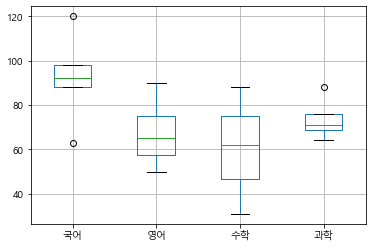

In [ ]:
# boxplot을 통해 극단치 확인한다.
# 동그라미로 표시되는 부분이 극단치에 해당한다.
# 극단치는 정상데이터 여부를 반드시 확인해야힌다.

plt.rcParams['font.family'] = 'Malgun Gothic'
df1[['국어','영어','수학','과학']].boxplot()
plt.show()

In [ ]:
# 카테고리형 데이터의 이상치 확인
df1['학년'].value_counts().index

Int64Index([1, 4, 3, 2], dtype='int64')

In [ ]:
# 이상치라고 판단되는 로우의 인덱스를 구한다.
idx = df1.query('국어 > 90').index

In [ ]:
# 제거 
df2 = df1.drop(idx)
df2

,학년,성별,국어,영어,수학,과학
이름,,,,,,
영희,2,여자,88,90.0,62.0,72.0
수현,3,여자,63,60.0,31.0,70.0


In [ ]:
# 다른 값으로 대체
df1.loc[idx,'국어'] = 90
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,90,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,90,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,90,50.0,NaN,88.0


In [ ]:
idx

Index(['철수', '민수', '호영'], dtype='object', name='이름')